In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("/Users/snehashah/Documents/CMS_Data/cms_flattened_data.csv", low_memory=False)
df.head(10)

,hospital_id,hospital_name,address,city,state,zip_code,county,hospital_type,hospital_ownership,readmission_measure,...,unplanned_visit_score,unplanned_num_patients,unplanned_num_patients_returned,unplanned_start_date,unplanned_end_date,timely_measure,timely_score,timely_sample_size,timely_start_date,timely_end_date
0,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,18.4,0.0,0.0,NaN,NaN,Intensive Care Unit Venous Thromboembolism Pro...,Not Available,0.0,NaN,NaN
1,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,18.4,0.0,0.0,NaN,NaN,Venous Thromboembolism Prophylaxis,Not Available,0.0,NaN,NaN
2,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,18.4,0.0,0.0,NaN,NaN,Discharged on Statin Medication,86,28.0,NaN,NaN
3,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,18.4,0.0,0.0,NaN,NaN,Antithrombotic Therapy by End of Hospital Day 2,Not Available,0.0,NaN,NaN
4,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,18.4,0.0,0.0,NaN,NaN,Anticoagulation Therapy for Atrial Fibrillatio...,Not Available,0.0,NaN,NaN
5,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,18.4,0.0,0.0,NaN,NaN,Discharged on Antithrombotic Therapy,83,29.0,NaN,NaN
6,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,18.4,0.0,0.0,NaN,NaN,Severe Sepsis 6-Hour Bundle,97,58.0,NaN,NaN
7,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,18.4,0.0,0.0,NaN,NaN,Severe Sepsis 3-Hour Bundle,76,178.0,NaN,NaN
8,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,18.4,0.0,0.0,NaN,NaN,Septic Shock 6-Hour Bundle,Not Available,0.0,NaN,NaN
9,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,18.4,0.0,0.0,NaN,NaN,Septic Shock 3-Hour Bundle,86,22.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477517 entries, 0 to 1477516
Data columns (total 27 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   hospital_id                      1477517 non-null  object 
 1   hospital_name                    1477517 non-null  object 
 2   address                          1477517 non-null  object 
 3   city                             1477517 non-null  object 
 4   state                            1477517 non-null  object 
 5   zip_code                         1477517 non-null  int64  
 6   county                           1477517 non-null  object 
 7   hospital_type                    1477517 non-null  object 
 8   hospital_ownership               1477517 non-null  object 
 9   readmission_measure              1460004 non-null  object 
 10  excess_readmission_ratio         1460004 non-null  float64
 11  predicted_readmission_rate       1460004 non-null 

In [4]:
df.describe()

,zip_code,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,num_readmissions,readmission_start_date,readmission_end_date,unplanned_num_patients,unplanned_num_patients_returned,unplanned_start_date,unplanned_end_date,timely_sample_size,timely_start_date,timely_end_date
count,1.477517e+06,1.460004e+06,1.460004e+06,1.460004e+06,1.460004e+06,0.0,0.0,1.477476e+06,1.477476e+06,0.0,0.0,1.477364e+06,0.0,0.0
mean,9.365818e+04,7.229628e-01,1.073673e+01,1.061968e+01,2.340713e+01,NaN,NaN,4.181644e+01,1.219124e+01,NaN,NaN,2.199145e+03,NaN,NaN
std,1.738636e+03,4.623137e-01,8.088126e+00,7.953411e+00,3.629933e+01,NaN,NaN,1.171552e+02,3.469844e+01,NaN,NaN,1.030769e+04,NaN,NaN
min,9.001500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,NaN,NaN
25%,9.250100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,NaN,NaN
50%,9.411700e+04,9.726000e-01,1.359970e+01,1.335180e+01,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,1.700000e+01,NaN,NaN
75%,9.534000e+04,1.034900e+00,1.758920e+01,1.781630e+01,3.500000e+01,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,2.620000e+02,NaN,NaN
max,9.616100e+04,1.491900e+00,2.649320e+01,2.498000e+01,4.370000e+02,NaN,NaN,1.571000e+03,4.920000e+02,NaN,NaN,1.902890e+05,NaN,NaN


In [5]:
df.replace("Not Available", np.nan, inplace=True)
df = df.drop(columns=['readmission_start_date','readmission_end_date','unplanned_start_date','unplanned_end_date','timely_start_date','timely_end_date'])
df.head(5)

,hospital_id,hospital_name,address,city,state,zip_code,county,hospital_type,hospital_ownership,readmission_measure,...,predicted_readmission_rate,expected_readmission_rate,num_readmissions,unplanned_visit_measure,unplanned_visit_score,unplanned_num_patients,unplanned_num_patients_returned,timely_measure,timely_score,timely_sample_size
0,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,16.4746,16.3396,0.0,Pneumonia (PN) 30-Day Readmission Rate,18.4,0.0,0.0,Intensive Care Unit Venous Thromboembolism Pro...,NaN,0.0
1,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,16.4746,16.3396,0.0,Pneumonia (PN) 30-Day Readmission Rate,18.4,0.0,0.0,Venous Thromboembolism Prophylaxis,NaN,0.0
2,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,16.4746,16.3396,0.0,Pneumonia (PN) 30-Day Readmission Rate,18.4,0.0,0.0,Discharged on Statin Medication,86,28.0
3,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,16.4746,16.3396,0.0,Pneumonia (PN) 30-Day Readmission Rate,18.4,0.0,0.0,Antithrombotic Therapy by End of Hospital Day 2,NaN,0.0
4,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-AMI-HRRP,...,16.4746,16.3396,0.0,Pneumonia (PN) 30-Day Readmission Rate,18.4,0.0,0.0,Anticoagulation Therapy for Atrial Fibrillatio...,NaN,0.0


In [6]:
df['readmission_measure'].value_counts(dropna=True)

readmission_measure
READM-30-AMI-HRRP         243334
READM-30-PN-HRRP          243334
READM-30-CABG-HRRP        243334
READM-30-COPD-HRRP        243334
READM-30-HF-HRRP          243334
READM-30-HIP-KNEE-HRRP    243334
Name: count, dtype: int64

In [7]:
df_HF = df[df['readmission_measure'] == 'READM-30-HF-HRRP'].copy()
df_HF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243334 entries, 1456 to 1476635
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   hospital_id                      243334 non-null  object 
 1   hospital_name                    243334 non-null  object 
 2   address                          243334 non-null  object 
 3   city                             243334 non-null  object 
 4   state                            243334 non-null  object 
 5   zip_code                         243334 non-null  int64  
 6   county                           243334 non-null  object 
 7   hospital_type                    243334 non-null  object 
 8   hospital_ownership               243334 non-null  object 
 9   readmission_measure              243334 non-null  object 
 10  excess_readmission_ratio         243334 non-null  float64
 11  predicted_readmission_rate       243334 non-null  float64
 12  exp

In [8]:
df_HF["timely_score"] = pd.to_numeric(df_HF["timely_score"], errors="coerce")
df_HF["unplanned_visit_score"] = pd.to_numeric(df["unplanned_visit_score"], errors="coerce")

df_HF["timely_score"] = df_HF.groupby('hospital_type')['unplanned_visit_score'].transform(
    lambda x: x.fillna(x.mean())
)
df_HF["unplanned_visit_score"] = df_HF.groupby('timely_measure')['timely_score'].transform(
    lambda x: x.fillna(x.median())
)
df_HF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243334 entries, 1456 to 1476635
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   hospital_id                      243334 non-null  object 
 1   hospital_name                    243334 non-null  object 
 2   address                          243334 non-null  object 
 3   city                             243334 non-null  object 
 4   state                            243334 non-null  object 
 5   zip_code                         243334 non-null  int64  
 6   county                           243334 non-null  object 
 7   hospital_type                    243334 non-null  object 
 8   hospital_ownership               243334 non-null  object 
 9   readmission_measure              243334 non-null  object 
 10  excess_readmission_ratio         243334 non-null  float64
 11  predicted_readmission_rate       243334 non-null  float64
 12  exp

In [9]:
df_HF.head(5)

,hospital_id,hospital_name,address,city,state,zip_code,county,hospital_type,hospital_ownership,readmission_measure,...,predicted_readmission_rate,expected_readmission_rate,num_readmissions,unplanned_visit_measure,unplanned_visit_score,unplanned_num_patients,unplanned_num_patients_returned,timely_measure,timely_score,timely_sample_size
1456,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-HF-HRRP,...,20.7553,19.4105,28.0,Pneumonia (PN) 30-Day Readmission Rate,18.4,0.0,0.0,Intensive Care Unit Venous Thromboembolism Pro...,18.4,0.0
1457,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-HF-HRRP,...,20.7553,19.4105,28.0,Pneumonia (PN) 30-Day Readmission Rate,18.4,0.0,0.0,Venous Thromboembolism Prophylaxis,18.4,0.0
1458,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-HF-HRRP,...,20.7553,19.4105,28.0,Pneumonia (PN) 30-Day Readmission Rate,18.4,0.0,0.0,Discharged on Statin Medication,18.4,28.0
1459,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-HF-HRRP,...,20.7553,19.4105,28.0,Pneumonia (PN) 30-Day Readmission Rate,18.4,0.0,0.0,Antithrombotic Therapy by End of Hospital Day 2,18.4,0.0
1460,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,Acute Care Hospitals,Voluntary non-profit - Church,READM-30-HF-HRRP,...,20.7553,19.4105,28.0,Pneumonia (PN) 30-Day Readmission Rate,18.4,0.0,0.0,Anticoagulation Therapy for Atrial Fibrillatio...,18.4,0.0


In [10]:
agg_df_HF = df_HF.groupby("hospital_id").agg({
    "excess_readmission_ratio": "mean",
    "predicted_readmission_rate": "mean",
    "expected_readmission_rate": "mean",
    "num_readmissions": "mean",
    "unplanned_visit_score": "mean",
    "unplanned_num_patients": "mean",
    "unplanned_num_patients_returned": "mean",
    "timely_score": "mean",
    "timely_sample_size": "mean",
    # optional: take mode of categorical vars
    "hospital_name": lambda x: x.mode().iloc[0],
    "hospital_type": lambda x: x.mode().iloc[0],
    "hospital_ownership": lambda x: x.mode().iloc[0],
    "state": lambda x: x.mode().iloc[0],
    "zip_code": "first",
    "county": lambda x: x.mode().iloc[0],
}).reset_index()
agg_df_HF.shape

(277, 16)

In [11]:
agg_df_HF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   hospital_id                      277 non-null    object 
 1   excess_readmission_ratio         277 non-null    float64
 2   predicted_readmission_rate       277 non-null    float64
 3   expected_readmission_rate        277 non-null    float64
 4   num_readmissions                 277 non-null    float64
 5   unplanned_visit_score            277 non-null    float64
 6   unplanned_num_patients           277 non-null    float64
 7   unplanned_num_patients_returned  277 non-null    float64
 8   timely_score                     277 non-null    float64
 9   timely_sample_size               277 non-null    float64
 10  hospital_name                    277 non-null    object 
 11  hospital_type                    277 non-null    object 
 12  hospital_ownership    

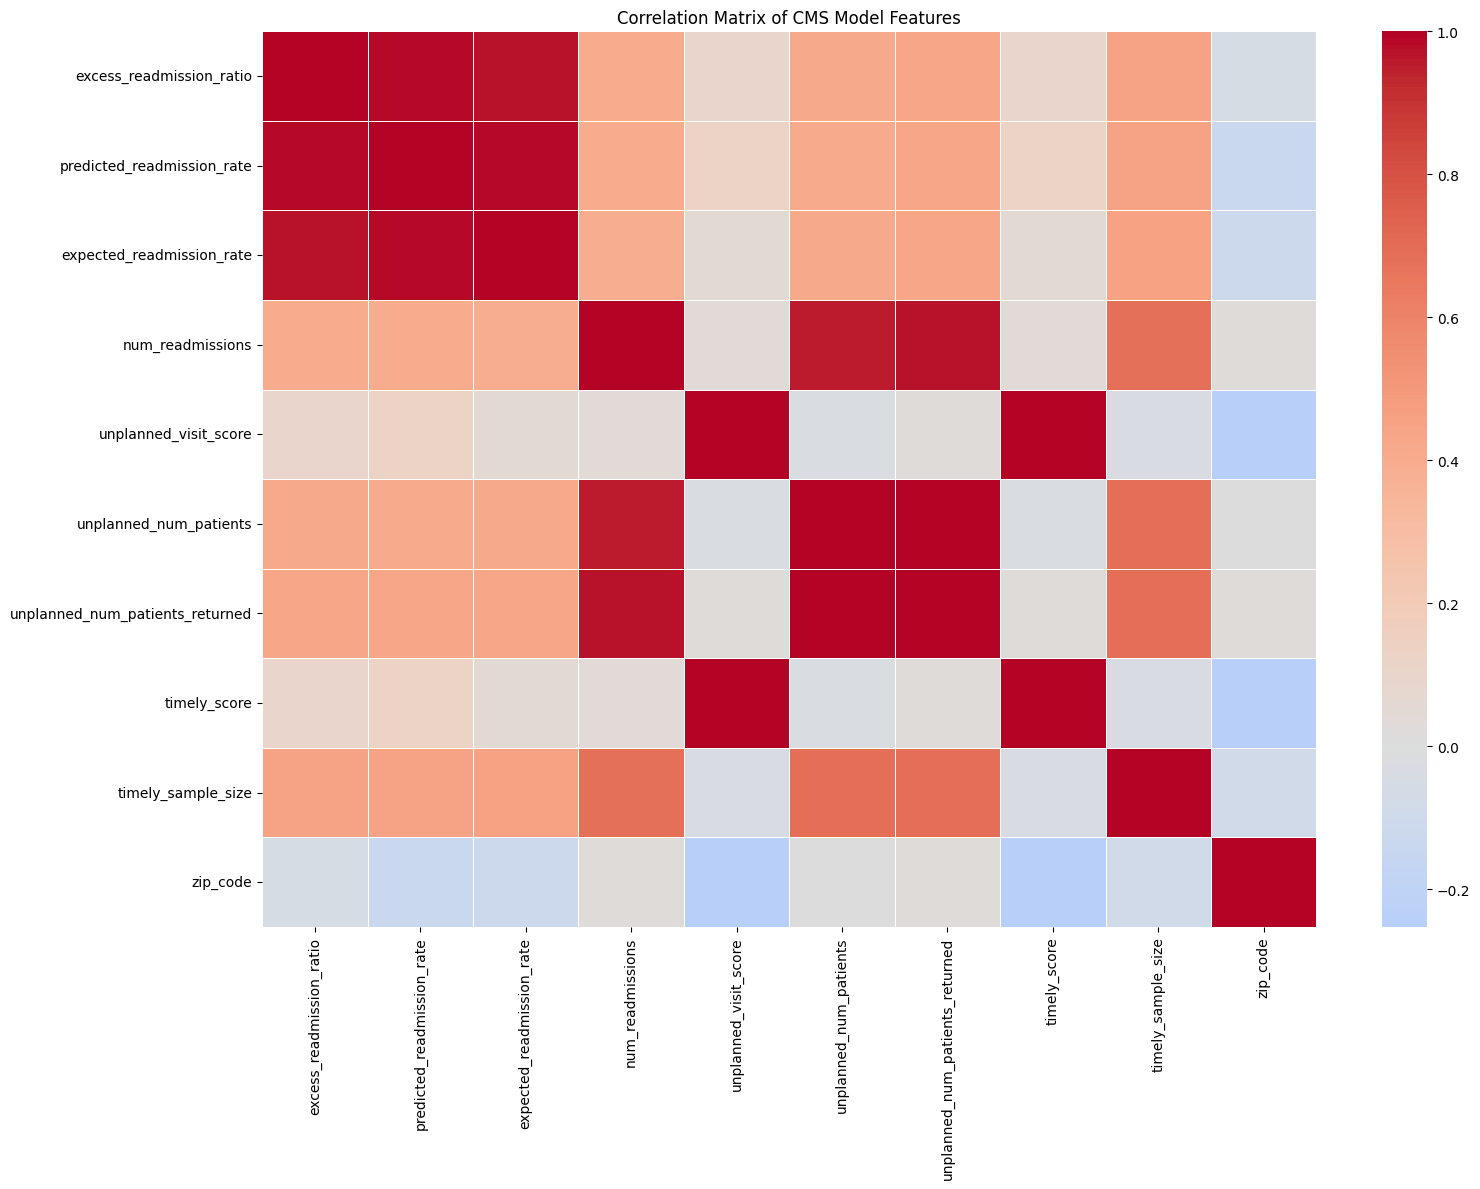

In [12]:
numeric_df = agg_df_HF.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of CMS Model Features")
plt.tight_layout()
plt.show()

In [13]:
X = agg_df_HF.drop(columns=["hospital_id", "excess_readmission_ratio", "county", "zip_code", "hospital_name","state"])  # adjust if you have extra ID cols
print(X.shape)
X = pd.get_dummies(X, drop_first=True)  # handle any categorical variables
print(X.shape)

y = agg_df_HF["excess_readmission_ratio"]

(277, 10)
(277, 16)


In [14]:
X.head(5)

,predicted_readmission_rate,expected_readmission_rate,num_readmissions,unplanned_visit_score,unplanned_num_patients,unplanned_num_patients_returned,timely_score,timely_sample_size,hospital_ownership_Government - Hospital District or Authority,hospital_ownership_Government - Local,hospital_ownership_Government - State,hospital_ownership_Physician,hospital_ownership_Proprietary,hospital_ownership_Voluntary non-profit - Church,hospital_ownership_Voluntary non-profit - Other,hospital_ownership_Voluntary non-profit - Private
0,20.7553,19.4105,28.0,12.381673,22.571429,8.214286,12.381673,1156.461538,False,False,False,False,False,True,False,False
1,17.9348,20.6331,63.0,9.619032,30.500000,7.821429,9.619032,962.096154,False,False,False,False,False,False,False,True
2,18.3252,18.9694,94.0,7.707143,56.785714,16.928571,7.707143,2694.423077,False,False,False,False,False,False,False,True
3,18.9748,18.0379,17.0,13.067199,8.000000,2.785714,13.067199,918.923077,False,False,False,False,False,False,True,False
4,19.4985,19.9912,54.0,9.196335,44.142857,13.071429,9.196335,1488.307692,False,False,False,False,False,True,False,False


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
rf_im_df = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)
print('Random Forest Feature Importance:')
print(rf_im_df.head(20))

Random Forest Feature Importance:
                                              feature  importance
0                          predicted_readmission_rate    0.511474
1                           expected_readmission_rate    0.475526
4                              unplanned_num_patients    0.009762
5                     unplanned_num_patients_returned    0.000954
2                                    num_readmissions    0.000628
6                                        timely_score    0.000569
3                               unplanned_visit_score    0.000467
7                                  timely_sample_size    0.000421
15  hospital_ownership_Voluntary non-profit - Private    0.000060
14    hospital_ownership_Voluntary non-profit - Other    0.000047
12                     hospital_ownership_Proprietary    0.000032
8   hospital_ownership_Government - Hospital Distr...    0.000027
13   hospital_ownership_Voluntary non-profit - Church    0.000025
9               hospital_ownership_Governm

In [17]:
features = ['predicted_readmission_rate', 'expected_readmission_rate', 'unplanned_num_patients', 'unplanned_num_patients_returned']
X = agg_df_HF[features]
y = agg_df_HF["excess_readmission_ratio"]

In [18]:
X = pd.get_dummies(X, drop_first=True)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)

lm_model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Model 1 - Linear Regression")
cv_r = []
for fold, (train_i,val_i) in enumerate(kf.split(X_train),1):
    X_train_f, X_val_f = X_train.iloc[train_i], X_train.iloc[val_i]
    y_train_f, y_val_f = y_train.iloc[train_i], y_train.iloc[val_i]

    s = StandardScaler()
    X_train_s = s.fit_transform(X_train_f)
    X_val_s = s.transform(X_val_f)

    lm_model.fit(X_train_s,y_train_f)
    y_pred = lm_model.predict(X_val_s)

    mse = mean_squared_error(y_val_f, y_pred)
    mae = mean_absolute_error(y_val_f, y_pred)
    r2 = r2_score(y_val_f, y_pred)

    cv_r.append({'Fold': fold, 'MSE': mse, 'MAE': mae, 'R2': r2})
    
    print(f"Fold {fold} - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

Model 1 - Linear Regression
Fold 1 - MSE: 0.0060, MAE: 0.0567, R2: 0.9575
Fold 2 - MSE: 0.0041, MAE: 0.0517, R2: 0.9676
Fold 3 - MSE: 0.0041, MAE: 0.0493, R2: 0.9737
Fold 4 - MSE: 0.0058, MAE: 0.0552, R2: 0.9456
Fold 5 - MSE: 0.0054, MAE: 0.0560, R2: 0.9570


In [19]:
avg_mse = np.mean([fold['MSE'] for fold in cv_r])
avg_mae = np.mean([fold['MAE'] for fold in cv_r])
avg_r2 = np.mean([fold['R2'] for fold in cv_r])
print(f"\nAverage CV - MSE: {avg_mse:.4f}, MAE: {avg_mae:.4f}, R2: {avg_r2:.4f}")


Average CV - MSE: 0.0051, MAE: 0.0538, R2: 0.9603


In [20]:
s_2 = StandardScaler()
X_train_s = s_2.fit_transform(X_train)
X_val_s = s_2.transform(X_val)

In [21]:
lm_model.fit(X_train_s,y_train)
y_pred_val = lm_model.predict(X_val_s)

In [22]:
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f"\nValidation Results - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")


Validation Results - MSE: 0.0040, MAE: 0.0487, R2: 0.9781


In [23]:
X_test_s = s_2.transform(X_test)
y_pred_test = lm_model.predict(X_test_s)

In [24]:
mse_t = mean_squared_error(y_test, y_pred_test)
mae_t = mean_absolute_error(y_test, y_pred_test)
r2_t = r2_score(y_test, y_pred_test)
print(f"\nTest Results - MSE: {mse_t:.4f}, MAE: {mae_t:.4f}, R2: {r2_t:.4f}")


Test Results - MSE: 0.0065, MAE: 0.0592, R2: 0.9485


In [25]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)

In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Model 2 - Random Forest Regression")
cv_r = []
for fold, (train_i,val_i) in enumerate(kf.split(X_train),1):
    X_train_f, X_val_f = X_train.iloc[train_i], X_train.iloc[val_i]
    y_train_f, y_val_f = y_train.iloc[train_i], y_train.iloc[val_i]

    s = StandardScaler()
    X_train_s = s.fit_transform(X_train_f)
    X_val_s = s.transform(X_val_f)

    rf_model.fit(X_train_s,y_train_f)
    y_pred = rf_model.predict(X_val_s)

    mse = mean_squared_error(y_val_f, y_pred)
    mae = mean_absolute_error(y_val_f, y_pred)
    r2 = r2_score(y_val_f, y_pred)

    cv_r.append({'Fold': fold, 'MSE': mse, 'MAE': mae, 'R2': r2})
    
    print(f"Fold {fold} - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

Model 2 - Random Forest Regression
Fold 1 - MSE: 0.0004, MAE: 0.0151, R2: 0.9969
Fold 2 - MSE: 0.0002, MAE: 0.0113, R2: 0.9981
Fold 3 - MSE: 0.0040, MAE: 0.0186, R2: 0.9745
Fold 4 - MSE: 0.0012, MAE: 0.0199, R2: 0.9883
Fold 5 - MSE: 0.0006, MAE: 0.0155, R2: 0.9954


In [27]:
avg_mse = np.mean([fold['MSE'] for fold in cv_r])
avg_mae = np.mean([fold['MAE'] for fold in cv_r])
avg_r2 = np.mean([fold['R2'] for fold in cv_r])
print(f"\nAverage CV - MSE: {avg_mse:.4f}, MAE: {avg_mae:.4f}, R2: {avg_r2:.4f}")


Average CV - MSE: 0.0013, MAE: 0.0161, R2: 0.9906


In [28]:
s_2 = StandardScaler()
X_train_s = s_2.fit_transform(X_train)
X_val_s = s_2.transform(X_val)

In [29]:
rf_model.fit(X_train_s,y_train)
y_pred_val = rf_model.predict(X_val_s)

In [30]:
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f"\nValidation Results - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")


Validation Results - MSE: 0.0007, MAE: 0.0143, R2: 0.9960


In [31]:
X_test_s = s_2.transform(X_test)
y_pred_test = rf_model.predict(X_test_s)

In [32]:
mse_t = mean_squared_error(y_test, y_pred_test)
mae_t = mean_absolute_error(y_test, y_pred_test)
r2_t = r2_score(y_test, y_pred_test)
print(f"\nTest Results - MSE: {mse_t:.4f}, MAE: {mae_t:.4f}, R2: {r2_t:.4f}")


Test Results - MSE: 0.0004, MAE: 0.0108, R2: 0.9967


In [33]:
gb_model = GradientBoostingRegressor()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Model 3 - Gradient Boosting Regression")
cv_r = []
for fold, (train_i,val_i) in enumerate(kf.split(X_train),1):
    X_train_f, X_val_f = X_train.iloc[train_i], X_train.iloc[val_i]
    y_train_f, y_val_f = y_train.iloc[train_i], y_train.iloc[val_i]

    s = StandardScaler()
    X_train_s = s.fit_transform(X_train_f)
    X_val_s = s.transform(X_val_f)

    gb_model.fit(X_train_s,y_train_f)
    y_pred = gb_model.predict(X_val_s)

    mse = mean_squared_error(y_val_f, y_pred)
    mae = mean_absolute_error(y_val_f, y_pred)
    r2 = r2_score(y_val_f, y_pred)

    cv_r.append({'Fold': fold, 'MSE': mse, 'MAE': mae, 'R2': r2})
    
    print(f"Fold {fold} - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

Model 3 - Gradient Boosting Regression
Fold 1 - MSE: 0.0004, MAE: 0.0137, R2: 0.9975
Fold 2 - MSE: 0.0002, MAE: 0.0104, R2: 0.9985
Fold 3 - MSE: 0.0011, MAE: 0.0114, R2: 0.9932
Fold 4 - MSE: 0.0007, MAE: 0.0156, R2: 0.9931
Fold 5 - MSE: 0.0003, MAE: 0.0113, R2: 0.9980


In [34]:
avg_mse = np.mean([fold['MSE'] for fold in cv_r])
avg_mae = np.mean([fold['MAE'] for fold in cv_r])
avg_r2 = np.mean([fold['R2'] for fold in cv_r])
print(f"\nAverage CV - MSE: {avg_mse:.4f}, MAE: {avg_mae:.4f}, R2: {avg_r2:.4f}")


Average CV - MSE: 0.0005, MAE: 0.0125, R2: 0.9960


In [35]:
s_2 = StandardScaler()
X_train_s = s_2.fit_transform(X_train)
X_val_s = s_2.transform(X_val)

gb_model.fit(X_train_s,y_train)
y_pred_val = gb_model.predict(X_val_s)

mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f"\nValidation Results - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")


Validation Results - MSE: 0.0001, MAE: 0.0082, R2: 0.9992


In [36]:
X_test_s = s_2.transform(X_test)
y_pred_test = gb_model.predict(X_test_s)

mse_t = mean_squared_error(y_test, y_pred_test)
mae_t = mean_absolute_error(y_test, y_pred_test)
r2_t = r2_score(y_test, y_pred_test)
print(f"\nTest Results - MSE: {mse_t:.4f}, MAE: {mae_t:.4f}, R2: {r2_t:.4f}")


Test Results - MSE: 0.0002, MAE: 0.0089, R2: 0.9985


In [37]:
more_features = ['predicted_readmission_rate', 'expected_readmission_rate', 'unplanned_num_patients', 'unplanned_num_patients_returned', 
                 'num_readmissions', 'timely_score', 'unplanned_visit_score', 'timely_sample_size']
X = agg_df_HF[more_features]
y = agg_df_HF["excess_readmission_ratio"]

In [38]:
X = pd.get_dummies(X, drop_first=True)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)

lm_model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Model 1 - Linear Regression")
cv_r = []
for fold, (train_i,val_i) in enumerate(kf.split(X_train),1):
    X_train_f, X_val_f = X_train.iloc[train_i], X_train.iloc[val_i]
    y_train_f, y_val_f = y_train.iloc[train_i], y_train.iloc[val_i]

    s = StandardScaler()
    X_train_s = s.fit_transform(X_train_f)
    X_val_s = s.transform(X_val_f)

    lm_model.fit(X_train_s,y_train_f)
    y_pred = lm_model.predict(X_val_s)

    mse = mean_squared_error(y_val_f, y_pred)
    mae = mean_absolute_error(y_val_f, y_pred)
    r2 = r2_score(y_val_f, y_pred)

    cv_r.append({'Fold': fold, 'MSE': mse, 'MAE': mae, 'R2': r2})
    
    print(f"Fold {fold} - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

Model 1 - Linear Regression
Fold 1 - MSE: 0.0062, MAE: 0.0601, R2: 0.9561
Fold 2 - MSE: 0.0047, MAE: 0.0553, R2: 0.9629
Fold 3 - MSE: 0.0042, MAE: 0.0500, R2: 0.9733
Fold 4 - MSE: 0.0055, MAE: 0.0531, R2: 0.9481
Fold 5 - MSE: 0.0055, MAE: 0.0539, R2: 0.9566


In [39]:
avg_mse = np.mean([fold['MSE'] for fold in cv_r])
avg_mae = np.mean([fold['MAE'] for fold in cv_r])
avg_r2 = np.mean([fold['R2'] for fold in cv_r])
print(f"\nAverage CV - MSE: {avg_mse:.4f}, MAE: {avg_mae:.4f}, R2: {avg_r2:.4f}")


Average CV - MSE: 0.0052, MAE: 0.0545, R2: 0.9594


In [40]:
s_2 = StandardScaler()
X_train_s = s_2.fit_transform(X_train)
X_val_s = s_2.transform(X_val)

lm_model.fit(X_train_s,y_train)
y_pred_val = lm_model.predict(X_val_s)

mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f"\nValidation Results - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")


Validation Results - MSE: 0.0036, MAE: 0.0471, R2: 0.9803


In [41]:
X_test_s = s_2.transform(X_test)
y_pred_test = lm_model.predict(X_test_s)

mse_t = mean_squared_error(y_test, y_pred_test)
mae_t = mean_absolute_error(y_test, y_pred_test)
r2_t = r2_score(y_test, y_pred_test)
print(f"\nTest Results - MSE: {mse_t:.4f}, MAE: {mae_t:.4f}, R2: {r2_t:.4f}")


Test Results - MSE: 0.0062, MAE: 0.0578, R2: 0.9504


In [42]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Model 2 - Random Forest Regression")
cv_r = []
for fold, (train_i,val_i) in enumerate(kf.split(X_train),1):
    X_train_f, X_val_f = X_train.iloc[train_i], X_train.iloc[val_i]
    y_train_f, y_val_f = y_train.iloc[train_i], y_train.iloc[val_i]

    s = StandardScaler()
    X_train_s = s.fit_transform(X_train_f)
    X_val_s = s.transform(X_val_f)

    rf_model.fit(X_train_s,y_train_f)
    y_pred = rf_model.predict(X_val_s)

    mse = mean_squared_error(y_val_f, y_pred)
    mae = mean_absolute_error(y_val_f, y_pred)
    r2 = r2_score(y_val_f, y_pred)

    cv_r.append({'Fold': fold, 'MSE': mse, 'MAE': mae, 'R2': r2})
    
    print(f"Fold {fold} - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

Model 2 - Random Forest Regression
Fold 1 - MSE: 0.0005, MAE: 0.0168, R2: 0.9967
Fold 2 - MSE: 0.0006, MAE: 0.0177, R2: 0.9954
Fold 3 - MSE: 0.0041, MAE: 0.0216, R2: 0.9737
Fold 4 - MSE: 0.0016, MAE: 0.0235, R2: 0.9854
Fold 5 - MSE: 0.0008, MAE: 0.0214, R2: 0.9933


In [43]:
avg_mse = np.mean([fold['MSE'] for fold in cv_r])
avg_mae = np.mean([fold['MAE'] for fold in cv_r])
avg_r2 = np.mean([fold['R2'] for fold in cv_r])
print(f"\nAverage CV - MSE: {avg_mse:.4f}, MAE: {avg_mae:.4f}, R2: {avg_r2:.4f}")


Average CV - MSE: 0.0015, MAE: 0.0202, R2: 0.9889


In [44]:
s_2 = StandardScaler()
X_train_s = s_2.fit_transform(X_train)
X_val_s = s_2.transform(X_val)

rf_model.fit(X_train_s,y_train)
y_pred_val = rf_model.predict(X_val_s)

mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f"\nValidation Results - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")


Validation Results - MSE: 0.0007, MAE: 0.0166, R2: 0.9961


In [45]:
X_test_s = s_2.transform(X_test)
y_pred_test = rf_model.predict(X_test_s)

mse_t = mean_squared_error(y_test, y_pred_test)
mae_t = mean_absolute_error(y_test, y_pred_test)
r2_t = r2_score(y_test, y_pred_test)
print(f"\nTest Results - MSE: {mse_t:.4f}, MAE: {mae_t:.4f}, R2: {r2_t:.4f}")


Test Results - MSE: 0.0005, MAE: 0.0121, R2: 0.9962


In [46]:
gb_model = GradientBoostingRegressor()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Model 3 - Gradient Boosting Regression")
cv_r = []
for fold, (train_i,val_i) in enumerate(kf.split(X_train),1):
    X_train_f, X_val_f = X_train.iloc[train_i], X_train.iloc[val_i]
    y_train_f, y_val_f = y_train.iloc[train_i], y_train.iloc[val_i]

    s = StandardScaler()
    X_train_s = s.fit_transform(X_train_f)
    X_val_s = s.transform(X_val_f)

    gb_model.fit(X_train_s,y_train_f)
    y_pred = gb_model.predict(X_val_s)

    mse = mean_squared_error(y_val_f, y_pred)
    mae = mean_absolute_error(y_val_f, y_pred)
    r2 = r2_score(y_val_f, y_pred)

    cv_r.append({'Fold': fold, 'MSE': mse, 'MAE': mae, 'R2': r2})
    
    print(f"Fold {fold} - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

Model 3 - Gradient Boosting Regression
Fold 1 - MSE: 0.0005, MAE: 0.0166, R2: 0.9962
Fold 2 - MSE: 0.0004, MAE: 0.0141, R2: 0.9971
Fold 3 - MSE: 0.0006, MAE: 0.0116, R2: 0.9964
Fold 4 - MSE: 0.0008, MAE: 0.0176, R2: 0.9929
Fold 5 - MSE: 0.0004, MAE: 0.0139, R2: 0.9970


In [47]:
avg_mse = np.mean([fold['MSE'] for fold in cv_r])
avg_mae = np.mean([fold['MAE'] for fold in cv_r])
avg_r2 = np.mean([fold['R2'] for fold in cv_r])
print(f"\nAverage CV - MSE: {avg_mse:.4f}, MAE: {avg_mae:.4f}, R2: {avg_r2:.4f}")


Average CV - MSE: 0.0005, MAE: 0.0148, R2: 0.9959


In [48]:
s_2 = StandardScaler()
X_train_s = s_2.fit_transform(X_train)
X_val_s = s_2.transform(X_val)

gb_model.fit(X_train_s,y_train)
y_pred_val = gb_model.predict(X_val_s)

mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f"\nValidation Results - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")


Validation Results - MSE: 0.0002, MAE: 0.0084, R2: 0.9991


In [49]:
X_test_s = s_2.transform(X_test)
y_pred_test = gb_model.predict(X_test_s)

mse_t = mean_squared_error(y_test, y_pred_test)
mae_t = mean_absolute_error(y_test, y_pred_test)
r2_t = r2_score(y_test, y_pred_test)
print(f"\nTest Results - MSE: {mse_t:.4f}, MAE: {mae_t:.4f}, R2: {r2_t:.4f}")


Test Results - MSE: 0.0002, MAE: 0.0086, R2: 0.9986
